In [314]:
import numpy as np
import matplotlib.pyplot as plt

# 最小二乘法根据圆的边缘坐标求圆心和半径

# difine edge points

In [315]:
np.random.seed(0)
# 设置参数
radius = 5  # 圆的半径
angle = np.linspace(0, 2 * np.pi, 100)  # 生成100个角度值，从0到2π

# 根据圆的参数方程计算圆上的点
x = radius * np.cos(angle)# + np.random.normal(0, 0.02, 100)
y = radius * np.sin(angle)# + np.random.normal(0, 0.02, 100)

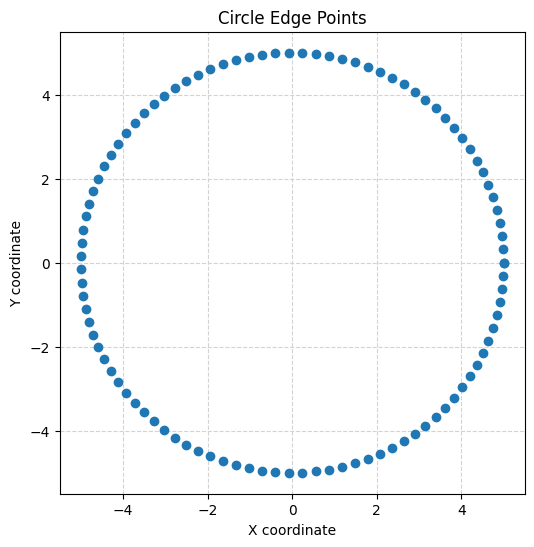

In [316]:
# 可视化圆上的点
plt.figure(figsize=(6, 6))
plt.plot(x, y, 'o')  # 使用散点图表示圆上的点
plt.title('Circle Edge Points')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.grid(color='lightgray', linestyle='--')
plt.show()

# implement1

https://www.cnblogs.com/xiaxuexiaoab/p/16276402.html

https://kimi.moonshot.cn/chat/cp290dsubms6ha9m74j0

In [317]:
def fit_circle_by_least_square1(points: list | np.ndarray) -> tuple:
    """根据最小二乘法求圆心和半径

    Args:
        points (list | np.ndarray): 圆的边缘的xy值, 二维数据
            example:
                [[x1, y1], [x2, y2], [x3, y3]...]

    Returns:
        tuple: 中心坐标x, 中心坐标y, 半径, 计算标准差
    """
    points = np.array(points)
    N = len(points)
    assert N >= 3, "圆的边缘点数量至少为3"

    sum_x = 0.0
    sum_y = 0.0
    sum_x2 = 0.0
    sum_y2 = 0.0
    sum_x3 = 0.0
    sum_y3 = 0.0
    sum_xy = 0.0
    sum_xy2 = 0.0
    sum_x2y = 0.0

    for x, y in points:
        sum_x += x
        sum_y += y

        x2 = x * x
        y2 = y * y
        sum_x2 += x2
        sum_y2 += y2

        sum_x3 += x2 * x
        sum_y3 += y2 * y

        sum_xy += x * y

        sum_xy2 += x * y2
        sum_x2y += x2 * y

    C = N * sum_x2 - sum_x ** 2
    D = N * sum_xy - sum_x * sum_y
    E = N * sum_x3 + N * sum_xy2 - (sum_x2 + sum_y2) * sum_x
    G = N * sum_y2 - sum_y ** 2
    H = N * sum_x2y + N * sum_y3 - (sum_x2 + sum_y2) * sum_y

    a = (H * D - E * G) / (C * G - D * D)
    b = (H * C - E * D) / (D * D - G * C)
    c = -(a * sum_x + b * sum_y + sum_x2 + sum_y2) / N

    center_x = -a / 2.0
    center_y = -b / 2.0
    radius = np.sqrt(a ** 2 + b ** 2 - 4 * c) / 2.0

    # err = 0.0
    # for point in points:
    #     e = np.sum((point - np.array([center_x, center_y])) ** 2) - radius ** 2
    #     if e > err:
    #         err = e
    # 求每个点到求出来的中心的距离
    radii = np.sqrt(np.sum((points - np.array([center_x, center_y])) ** 2, axis=1))
    # 计算中心距离和求出来的半径的标准差
    std_err = np.std(radii - radius)

    return center_x, center_y, radius, std_err

# implement2

In [318]:
def fit_circle_by_least_square2(points: list | np.ndarray) -> tuple:
    """根据最小二乘法求圆心和半径

    Args:
        points (list | np.ndarray): 圆的边缘的xy值, 二维数据
            example:
                [[x1, y1], [x2, y2], [x3, y3]...]

    Returns:
        tuple: 中心坐标x, 中心坐标y, 半径, 计算标准差
    """
    points = np.array(points)
    N = len(points)
    assert N >= 3, "圆的边缘点数量至少为3"

    x = points[:, 0]
    y = points[:, 1]
    x2 = x ** 2
    y2 = y ** 2

    sum_x = x.sum()
    sum_y = y.sum()
    sum_x2 = x2.sum()
    sum_y2 = y2.sum()
    sum_x3 = (x2 * x).sum()
    sum_y3 = (y2 * y).sum()
    sum_xy = (x * y).sum()
    sum_xy2 = (x * y2).sum()
    sum_x2y = (x2 * y).sum()

    C = N * sum_x2 - sum_x ** 2
    D = N * sum_xy - sum_x * sum_y
    E = N * sum_x3 + N * sum_xy2 - (sum_x2 + sum_y2) * sum_x
    G = N * sum_y2 - sum_y ** 2
    H = N * sum_x2y + N * sum_y3 - (sum_x2 + sum_y2) * sum_y

    a = (H * D - E * G) / (C * G - D * D)
    b = (H * C - E * D) / (D * D - G * C)
    c = -(a * sum_x + b * sum_y + sum_x2 + sum_y2) / N

    center_x = -a / 2.0
    center_y = -b / 2.0
    radius = np.sqrt(a ** 2 + b ** 2 - 4 * c) / 2.0

    # 求每个点到求出来的中心的距离
    radii = np.sqrt(np.sum((points - np.array([center_x, center_y])) ** 2, axis=1))
    # 计算中心距离和求出来的半径的标准差
    std_err = np.std(radii - radius)

    return center_x, center_y, radius, std_err

# test

In [319]:
compare_result = []

In [320]:
center_x, center_y, radius, err = fit_circle_by_least_square1(np.stack([x, y], axis=1))
center_x, center_y, radius, err

(-2.0895501169669183e-16, 1.550359167645115e-16, 5.0, 3.6350268448048564e-16)

In [321]:
center_x, center_y, radius, err = fit_circle_by_least_square2(np.stack([x, y], axis=1))
center_x, center_y, radius, err

(7.205345230920404e-17, 1.59073091399512e-16, 5.0, 3.730349362740526e-16)

In [322]:
compare_result.append([center_x, center_y, radius, err])

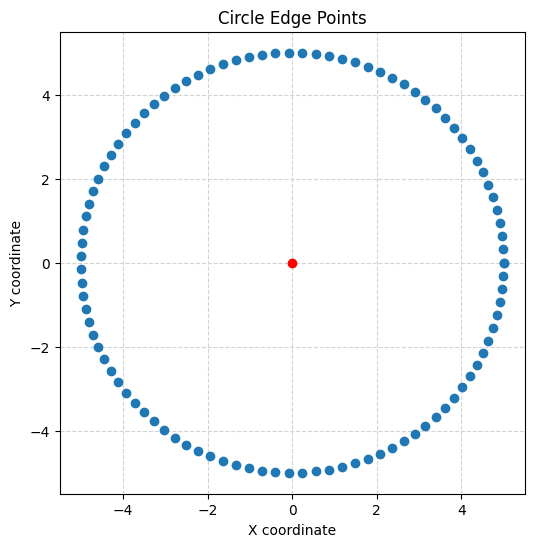

In [323]:
# 可视化圆上的点
plt.figure(figsize=(6, 6))
plt.plot(x, y, 'o')  # 使用散点图表示圆上的点
plt.plot(center_x, center_x, 'o', c='r')  # 使用散点图表示圆心
plt.title('Circle Edge Points')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.grid(color='lightgray', linestyle='--')
plt.show()

# test1

In [324]:
x_t = x[::2]
y_t = y[::2]
x_t[:5]

array([5.        , 4.95977406, 4.83974351, 4.64183967, 4.36924689])

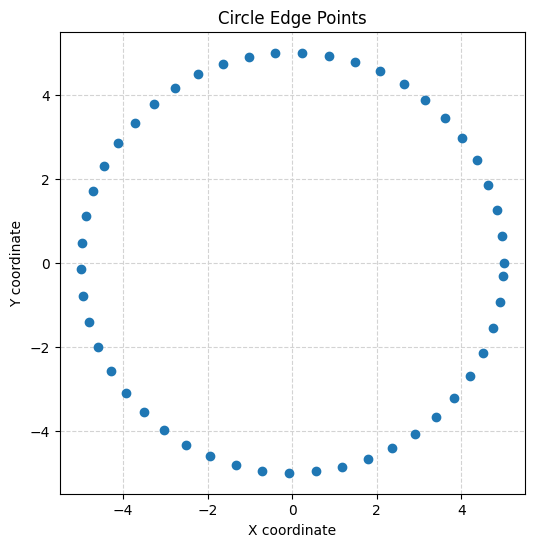

In [325]:
# 可视化圆上的点
plt.figure(figsize=(6, 6))
plt.plot(x_t, y_t, 'o')  # 使用散点图表示圆上的点
plt.title('Circle Edge Points')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.grid(color='lightgray', linestyle='--')
plt.show()

In [326]:
fit_circle_by_least_square1(np.stack([x_t, y_t], axis=1))

(-1.2225108282395433e-16, 3.848499403029179e-16, 5.0, 3.7640326589668923e-16)

In [327]:
center_x, center_y, radius, err = fit_circle_by_least_square2(np.stack([x_t, y_t], axis=1))
center_x, center_y, radius, err
# C = 126225.00000000003, D = -3.4057930693637114e-13, E = 1.8189894035458565e-11, G = 123750.0, H = 3.937059012137922e-11
# C = 31556.25, D = 31556.25, E = 3093.7500000000177, G = 31556.25, H = 3093.7500000000177

(4.330149171625798e-17, 1.1141767579854434e-16, 5.0, 3.5349054780433416e-16)

In [328]:
compare_result.append([center_x, center_y, radius, err])

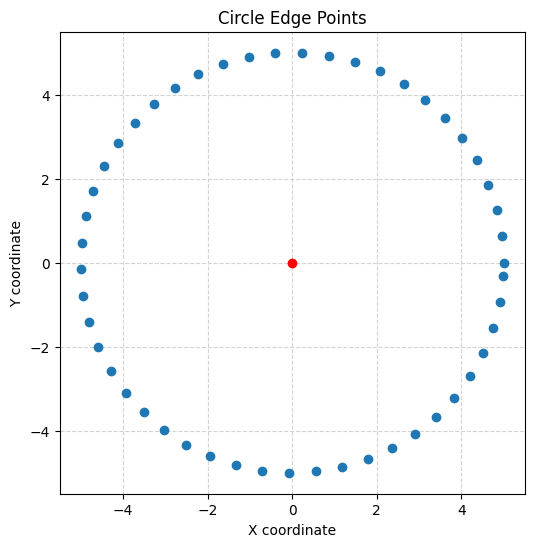

In [329]:
# 可视化圆上的点
plt.figure(figsize=(6, 6))
plt.plot(x_t, y_t, 'o')  # 使用散点图表示圆上的点
plt.plot(center_x, center_x, 'o', c='r')  # 使用散点图表示圆心
plt.title('Circle Edge Points')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.grid(color='lightgray', linestyle='--')
plt.show()

# test2

In [330]:
x_t = x[25:]
y_t = y[25:]
x_t[:5]

array([-0.07932982, -0.39624978, -0.71157419, -1.02403334, -1.33236907])

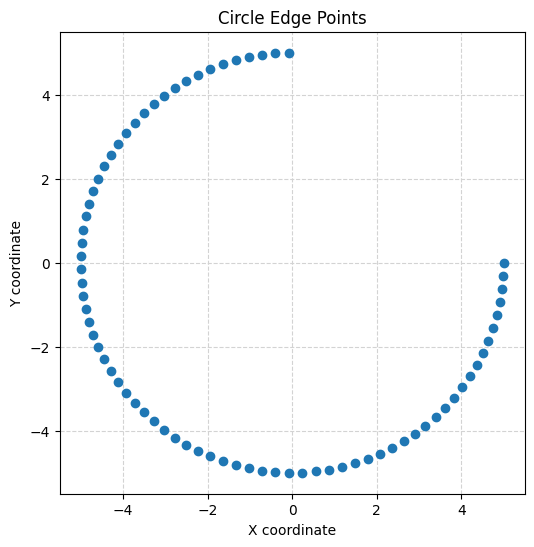

In [331]:
# 可视化圆上的点
plt.figure(figsize=(6, 6))
plt.plot(x_t, y_t, 'o')  # 使用散点图表示圆上的点
plt.title('Circle Edge Points')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.grid(color='lightgray', linestyle='--')
plt.show()

In [332]:
fit_circle_by_least_square1(np.stack([x_t, y_t], axis=1))

(0.0, 0.0, 5.0, 3.6036652902526444e-16)

In [333]:
center_x, center_y, radius, err = fit_circle_by_least_square2(np.stack([x_t, y_t], axis=1))
center_x, center_y, radius, err
# C = 126225.00000000003, D = -3.4057930693637114e-13, E = 1.8189894035458565e-11, G = 123750.0, H = 3.937059012137922e-11
# C = 31556.25, D = 31556.25, E = 3093.7500000000177, G = 31556.25, H = 3093.7500000000177

(5.821948256753532e-16, 4.149915119233058e-16, 5.0, 6.652845696061215e-16)

In [334]:
compare_result.append([center_x, center_y, radius, err])

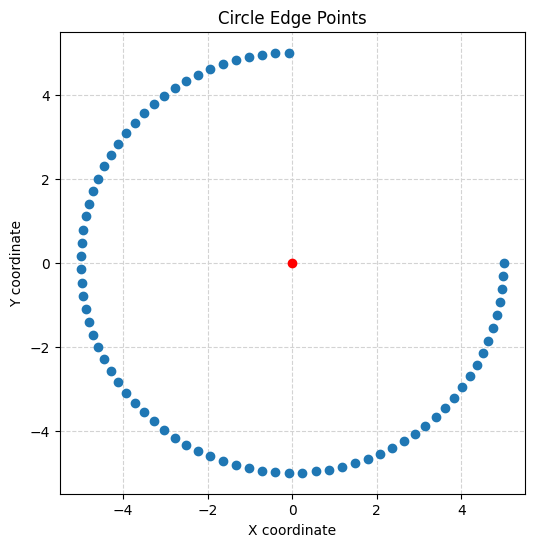

In [335]:
# 可视化圆上的点
plt.figure(figsize=(6, 6))
plt.plot(x_t, y_t, 'o')  # 使用散点图表示圆上的点
plt.plot(center_x, center_x, 'o', c='r')  # 使用散点图表示圆心
plt.title('Circle Edge Points')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.grid(color='lightgray', linestyle='--')
plt.show()

# test3

In [336]:
x_t = x[40::2]
y_t = y[40::2]
x_t[:5]

array([-4.11838291, -4.44417724, -4.6984631 , -4.87714893, -4.97735961])

In [337]:
x_t = np.concatenate([x_t[:10], x_t[20:]], axis=0)
y_t = np.concatenate([y_t[:10], y_t[20:]], axis=0)

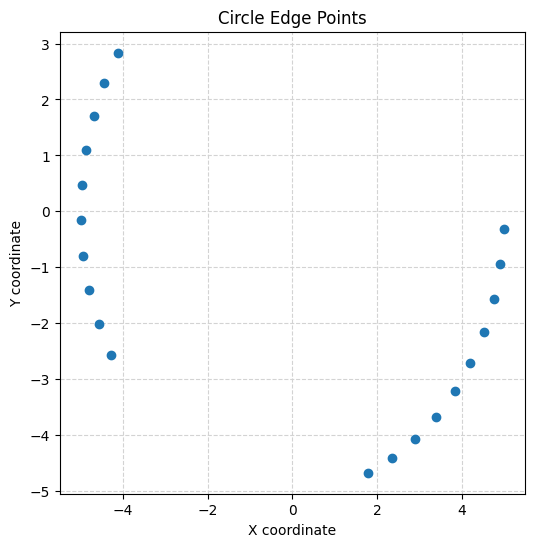

In [338]:
# 可视化圆上的点
plt.figure(figsize=(6, 6))
plt.plot(x_t, y_t, 'o')  # 使用散点图表示圆上的点
plt.title('Circle Edge Points')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.grid(color='lightgray', linestyle='--')
plt.show()

In [339]:
fit_circle_by_least_square1(np.stack([x_t, y_t], axis=1))

(3.4483911895225275e-16, -8.832333144612038e-17, 5.0, 4.0701448389020806e-16)

In [340]:
center_x, center_y, radius, err = fit_circle_by_least_square2(np.stack([x_t, y_t], axis=1))
center_x, center_y, radius, err
# C = 126225.00000000003, D = -3.4057930693637114e-13, E = 1.8189894035458565e-11, G = 123750.0, H = 3.937059012137922e-11
# C = 31556.25, D = 31556.25, E = 3093.7500000000177, G = 31556.25, H = 3093.7500000000177

(-1.8682684308684837e-16, -2.1564141030829262e-16, 5.0, 3.8714799753065006e-16)

In [341]:
compare_result.append([center_x, center_y, radius, err])

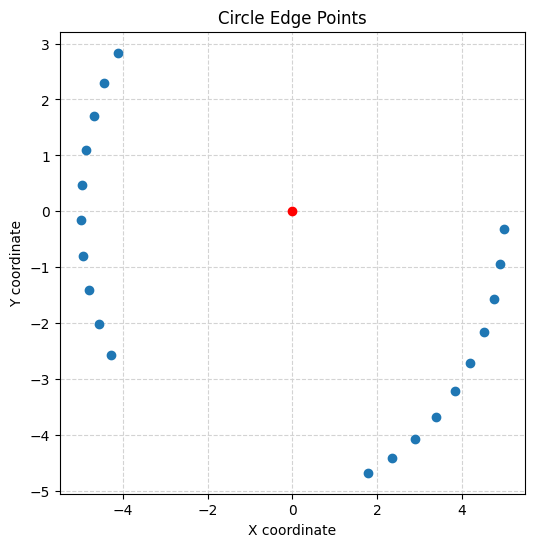

In [342]:
# 可视化圆上的点
plt.figure(figsize=(6, 6))
plt.plot(x_t, y_t, 'o')  # 使用散点图表示圆上的点
plt.plot(center_x, center_x, 'o', c='r')  # 使用散点图表示圆心
plt.title('Circle Edge Points')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.grid(color='lightgray', linestyle='--')
plt.show()

# test4

In [353]:
np.random.seed(0)
index = np.random.choice(100, 50)
index

array([44, 47, 64, 67, 67,  9, 83, 21, 36, 87, 70, 88, 88, 12, 58, 65, 39,
       87, 46, 88, 81, 37, 25, 77, 72,  9, 20, 80, 69, 79, 47, 64, 82, 99,
       88, 49, 29, 19, 19, 14, 39, 32, 65,  9, 57, 32, 31, 74, 23, 35])

In [354]:
x_t = x[index]
y_t = y[index]
x_t[:5]

array([-4.6984631 , -4.93719444, -3.02804844, -2.22033306, -2.22033306])

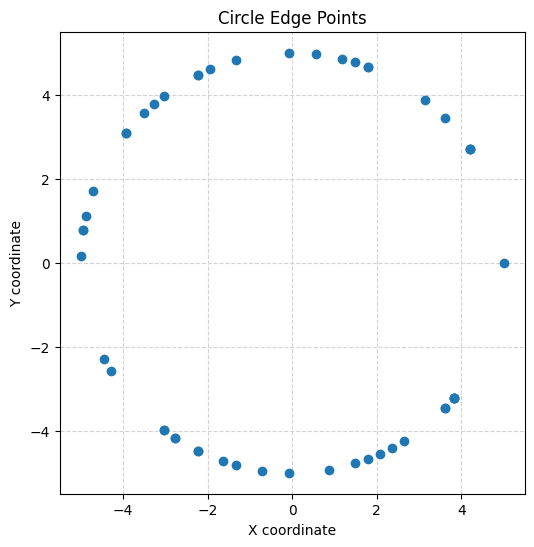

In [355]:
# 可视化圆上的点
plt.figure(figsize=(6, 6))
plt.plot(x_t, y_t, 'o')  # 使用散点图表示圆上的点
plt.title('Circle Edge Points')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.grid(color='lightgray', linestyle='--')
plt.show()

In [356]:
fit_circle_by_least_square1(np.stack([x_t, y_t], axis=1))

(2.2694431650134056e-16, 8.8601963184105e-17, 5.0, 4.3366397107056196e-16)

In [357]:
center_x, center_y, radius, err = fit_circle_by_least_square2(np.stack([x_t, y_t], axis=1))
center_x, center_y, radius, err
# C = 126225.00000000003, D = -3.4057930693637114e-13, E = 1.8189894035458565e-11, G = 123750.0, H = 3.937059012137922e-11
# C = 31556.25, D = 31556.25, E = 3093.7500000000177, G = 31556.25, H = 3093.7500000000177

(1.4150980924542547e-16, -3.949517194513359e-17, 5.0, 2.9935697558785387e-16)

In [358]:
compare_result.append([center_x, center_y, radius, err])

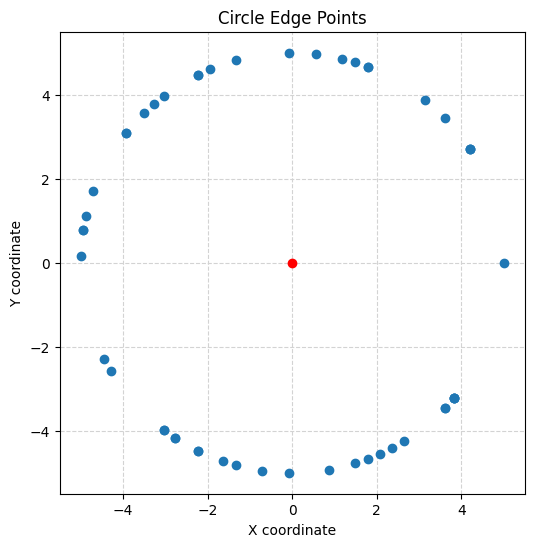

In [359]:
# 可视化圆上的点
plt.figure(figsize=(6, 6))
plt.plot(x_t, y_t, 'o')  # 使用散点图表示圆上的点
plt.plot(center_x, center_x, 'o', c='r')  # 使用散点图表示圆心
plt.title('Circle Edge Points')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.grid(color='lightgray', linestyle='--')
plt.show()

# compare result

In [360]:
import pandas as pd

In [361]:
compare_result

[[7.205345230920404e-17, 1.59073091399512e-16, 5.0, 3.730349362740526e-16],
 [4.330149171625798e-17, 1.1141767579854434e-16, 5.0, 3.5349054780433416e-16],
 [5.821948256753532e-16, 4.149915119233058e-16, 5.0, 6.652845696061215e-16],
 [-1.8682684308684837e-16,
  -2.1564141030829262e-16,
  5.0,
  3.8714799753065006e-16],
 [1.4150980924542547e-16, -3.949517194513359e-17, 5.0, 2.9935697558785387e-16],
 [1.4150980924542547e-16, -3.949517194513359e-17, 5.0, 2.9935697558785387e-16]]

In [362]:
pd.DataFrame(compare_result, columns=["center_x", "center_y", "radius", "err"])

,center_x,center_y,radius,err
0,7.205345e-17,1.590731e-16,5.0,3.730349e-16
1,4.330149e-17,1.114177e-16,5.0,3.534905e-16
2,5.821948e-16,4.149915e-16,5.0,6.652846e-16
3,-1.868268e-16,-2.156414e-16,5.0,3.871480e-16
4,1.415098e-16,-3.949517e-17,5.0,2.993570e-16
5,1.415098e-16,-3.949517e-17,5.0,2.993570e-16
